# Predicting Health Charges

#### Chris Richards
#### Practicum 1, Summer 2020
#### Regis University

### XGBoost Regression Models


In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import graphviz

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split

import xgboost as xgb

In [33]:
df = pd.read_csv(r"E:\Regis\Practicum_1\df_2_all_features.csv")
df_profile = df

In [34]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   bmi               1337 non-null   float64
 2   children          1337 non-null   int64  
 3   charges           1337 non-null   float64
 4   sex_female        1337 non-null   int64  
 5   sex_male          1337 non-null   int64  
 6   smoker_no         1337 non-null   int64  
 7   smoker_yes        1337 non-null   int64  
 8   region_northeast  1337 non-null   int64  
 9   region_northwest  1337 non-null   int64  
 10  region_southeast  1337 non-null   int64  
 11  region_southwest  1337 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 125.5 KB
None
               age          bmi     children       charges   sex_female  \
count  1337.000000  1337.000000  1337.000000   1337.000000  1337.000000   
mean     39.222139    30.66

#### Split the data into the test and train sets
The test size is set to 30% of the set.  A random seed of 1179 is set for reproducibility.  

In [35]:
#X = df.filter(items=['age', 'bmi', 'smoker_no', 'smoker_yes'])
X = df.loc[:, df.columns != 'charges'] # select all columns except for charges
y = df['charges']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1179)

In [37]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
171,49,30.300,0,0,1,1,0,0,0,0,1
395,46,19.855,0,0,1,1,0,0,1,0,0
408,38,21.120,3,0,1,1,0,0,0,1,0
1238,25,42.130,1,1,0,1,0,0,0,1,0
76,29,29.590,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1118,30,19.950,3,1,0,1,0,0,1,0,0
914,24,33.990,0,1,0,1,0,0,0,1,0
825,56,31.790,2,0,1,0,1,0,0,1,0
928,41,34.210,1,0,1,1,0,0,0,1,0


In [38]:
y_train

171      8116.68000
395      7526.70645
408      6652.52880
1238     3238.43570
76       3947.41310
           ...     
1118     5693.43050
914      2473.33410
825     43813.86610
928      6289.75490
655      3410.32400
Name: charges, Length: 935, dtype: float64

In [39]:
X_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
410,19,17.480,0,0,1,1,0,0,1,0,0
1264,64,23.760,0,0,1,0,1,0,0,1,0
454,32,46.530,2,0,1,1,0,0,0,1,0
781,51,35.970,1,0,1,1,0,0,0,1,0
279,51,21.560,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48,60,24.530,0,1,0,1,0,0,0,1,0
631,29,35.530,0,1,0,1,0,0,0,1,0
290,28,33.400,0,1,0,1,0,0,0,0,1
368,44,32.015,2,0,1,1,0,0,1,0,0


In [40]:
y_test

410      1621.34020
1264    26926.51440
454      4686.38870
781      9386.16130
279      9855.13140
           ...     
48      12629.89670
631      3366.66970
290      3172.01800
368      8116.26885
581      6356.27070
Name: charges, Length: 402, dtype: float64

#### XGBoost Model 1
  
  Create Dmatrix  
  Initial parameters

In [41]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [42]:
xg_reg_1 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10, eval_metric='rmse')

In [43]:
xg_reg_1.fit(X_train,y_train)
preds = xg_reg_1.predict(X_test)

In [44]:
score = xg_reg_1.score(X_train, y_train)*100
f"Accuracy (R^2) Model 1: {score:.2f}%"

'Accuracy (R^2) Model 1: 44.07%'

In [45]:
mse = mean_squared_error(preds, y_test)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

MSE: 85688105.86
RMSE: 9256.79


#### XGBoost Model 2
  
  New parameters:  
  - deeper tree
  - more boosted trees

In [46]:
xg_reg_2 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.90, learning_rate = 0.1, min_child_weight = 1,
                max_depth = 13, alpha = 10, n_estimators = 100, eval_metric='rmse', verbosity=0)

In [47]:
#mae

In [48]:
xg_reg_2.fit(X_train,y_train)
preds = xg_reg_2.predict(X_test)

In [49]:
score = xg_reg_2.score(X_train, y_train)*100
f"Accuracy (R^2) Model 2 training: {score:.2f}%"

'Accuracy (R^2) Model 2 training: 99.99%'

In [50]:
score = xg_reg_2.score(X_test, preds)*100
f"Accuracy (R^2) Model 2 testing: {score:.2f}%"

'Accuracy (R^2) Model 2 testing: 100.00%'

In [51]:
mse = mean_squared_error(preds, y_test)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

MSE: 27451185.24
RMSE: 5239.39


#### Model 2: Plot

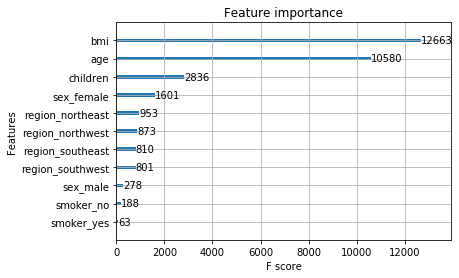

In [52]:
xgb.plot_importance(xg_reg_2)

In [53]:
#plt_xg_reg_2 = xgb.plot_tree(xg_reg_2, num_trees=99)

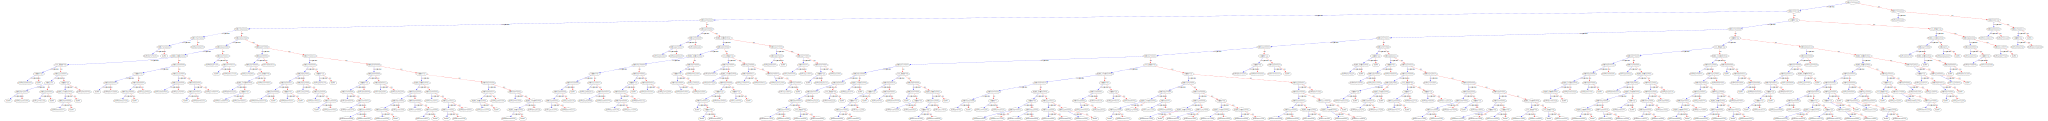

In [54]:
xgb.to_graphviz(xg_reg_2, num_trees=99)

#### Test out a prediction

In [55]:
# get max charge row
max_charge_row = df.loc[df['bmi'].idxmax()]
max_charge_row

age                   18.0000
bmi                   53.1300
children               0.0000
charges             1163.4627
sex_female             0.0000
sex_male               1.0000
smoker_no              1.0000
smoker_yes             0.0000
region_northeast       0.0000
region_northwest       0.0000
region_southeast       1.0000
region_southwest       0.0000
Name: 1316, dtype: float64

Create new test record similar to max charge record

In [56]:
new_rec_df = pd.DataFrame(max_charge_row)

In [57]:
new_rec_2_df = new_rec_df.transpose()
new_rec_2_df = new_rec_2_df.loc[:, new_rec_2_df.columns != 'charges']

In [58]:
new_rec_2_df.at[1316, 'age'] = 18
new_rec_2_df.at[1316, 'bmi'] = 53

In [59]:
new_rec_2_df

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1316,18.0,53.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


Predict on the new record

In [60]:
new_pred = xg_reg_2.predict(new_rec_2_df)

In [61]:
new_pred

array([1171.0135], dtype=float32)

In [62]:
xg_reg_2.save_model('xgb_predictive_model.json')